# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


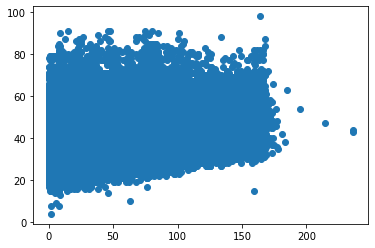

In [9]:
# По ощущениям возраст клиента не связан с длительностью взаимоотношений с банком :)
plt.scatter(df.full_mob, df.age)
plt.show()

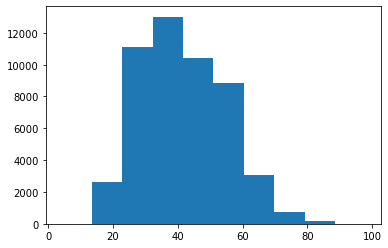

In [11]:
# У возраста нормальное распределение
plt.hist(df.age, bins = 10)
plt.show()

<AxesSubplot:ylabel='city_type'>

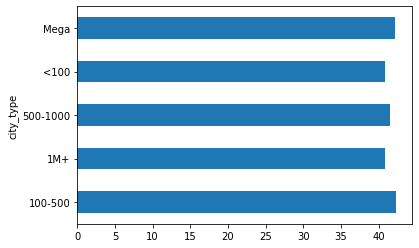

In [15]:
df.groupby('city_type')['age'].mean().plot(kind='barh')

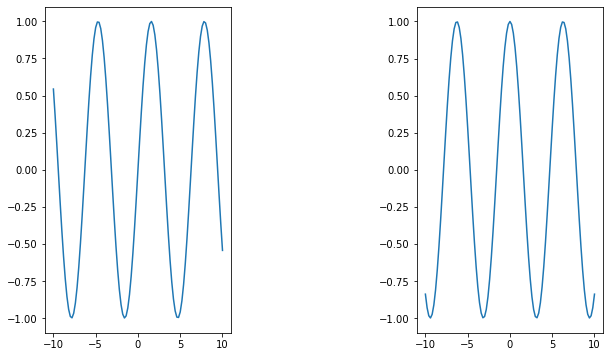

In [18]:
# Создадим 2 графика
x = np.linspace(-10, 10,101)
a = np.sin(x)
b = np.cos(x)
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,a)
ax2.plot(x,b)
fig.set_size_inches(10,6)
plt.subplots_adjust(hspace=0.3,wspace=1 )

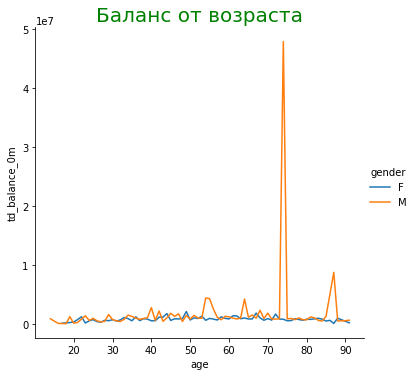

In [59]:
sns.relplot(
    x='age',
    y='td_balance_0m',
    hue='gender',
    dashes=False,
    markers=True,
    data=df[df.td_balance_0m!=0],
    kind='line',
    ci=None)
plt.title('Баланс от возраста', size=20, color='g');

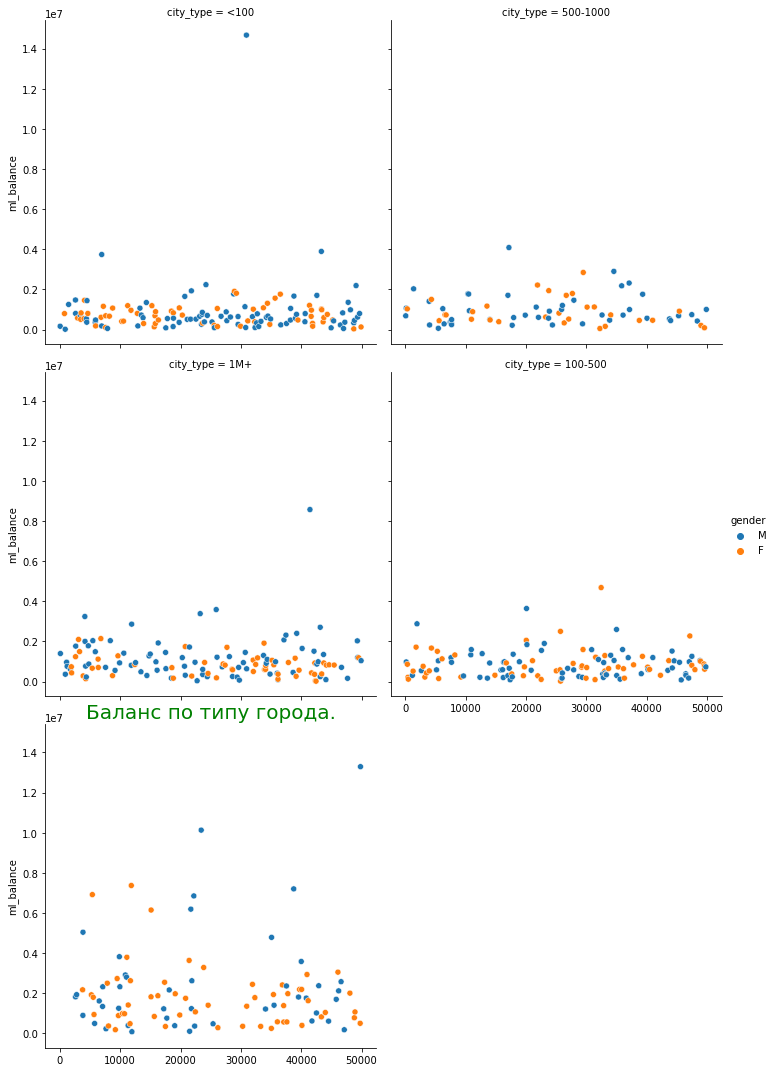

In [57]:
sns.relplot(
    x=df[df.ml_balance!=0].index,
    y='ml_balance',
    data=df[df.ml_balance!=0],
    col = 'city_type',
    hue='gender',
    col_wrap=2,
)
plt.title('Баланс по типу города.', size=20, color='g');

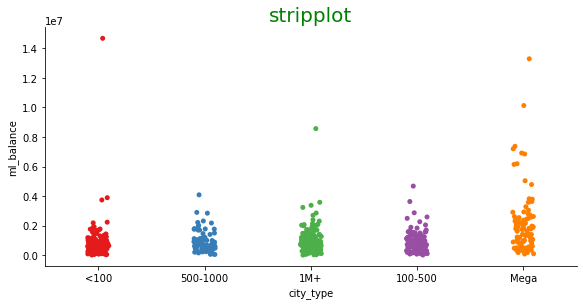

In [55]:
sns.catplot(
    x='city_type',
    y='ml_balance',
    data=df[df.ml_balance!=0],
    palette='Set1',
    height=4,
    aspect=2);

plt.title('stripplot', size=20, color='g');

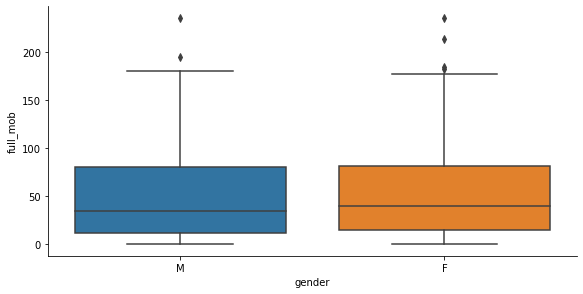

In [37]:
sns.catplot(
    x='gender',
    y='full_mob',
    data=df,
    kind='box',
    height=4,
    aspect=2);

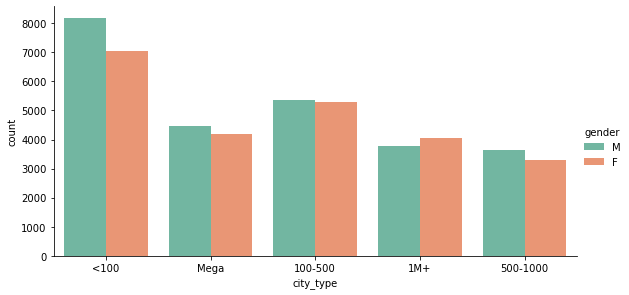

In [48]:
sns.catplot(
    x='city_type',
    data=df,
    kind='count',
    hue='gender',
    palette="Set2",
    height=4,
    aspect=2);

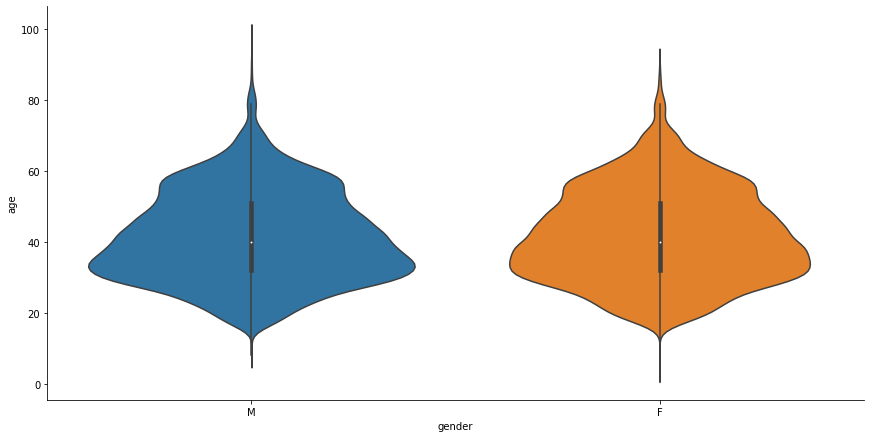

In [51]:
sns.catplot(
    x='gender',
    y='age',
    data=df,
    kind='violin',
    height=6,
    aspect=2)

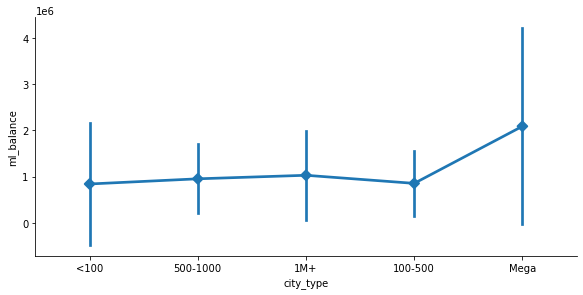

In [53]:
sns.catplot(
    x='city_type',
    y='ml_balance',
    data=df[df.ml_balance!=0],
    kind='point',
    markers='D',
    ci='sd',
    height=4,
    aspect=2)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ml_balance', ylabel='Density'>

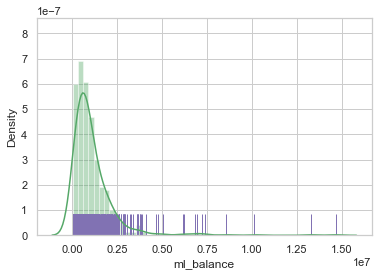

In [66]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.ml_balance[df.ml_balance!=0],
    color='g',
    rug=True,
    rug_kws={"color": 'm', "height": 0.1}
)

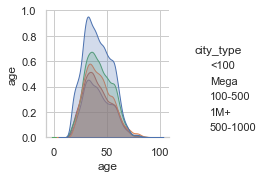

In [69]:
sns.pairplot(
    df[['gender','age', 'city_type']],
    hue='city_type',
    kind='reg'
)
plt.show();

In [107]:
cities_grade = {'<100': 1, '100-500': 2, '500-1000': 3, '1M+': 4, 'Mega': 5}
df['city_type_grade'] = df['city_type'].map(cities_grade)
corr = df.corr()

<AxesSubplot:>

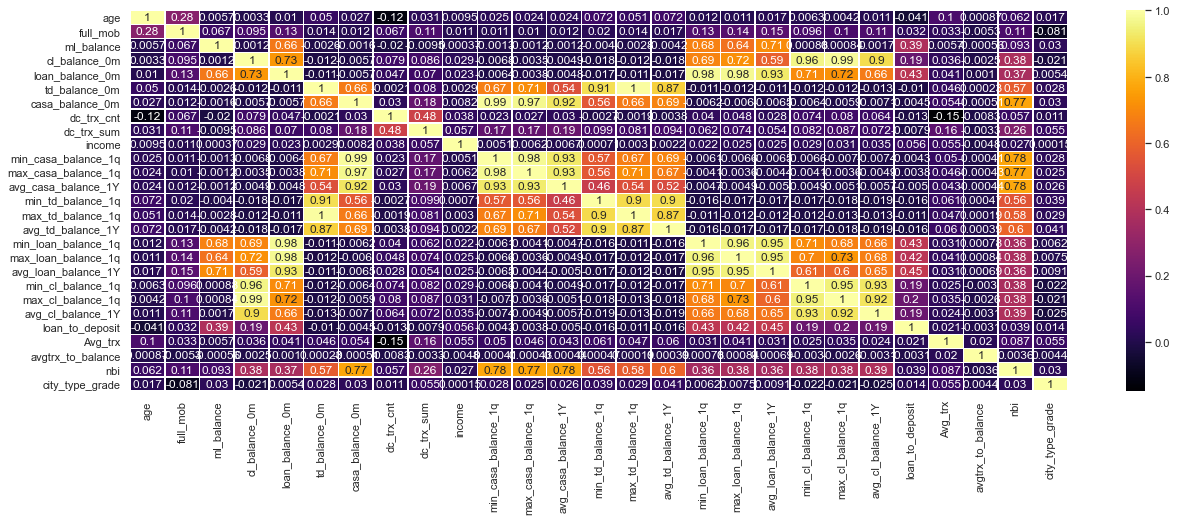

In [115]:
fig, ax1= plt.subplots(1, figsize=(21,7))

sns.heatmap(corr, annot=True, linewidths=.5, cmap="inferno", ax=ax1)

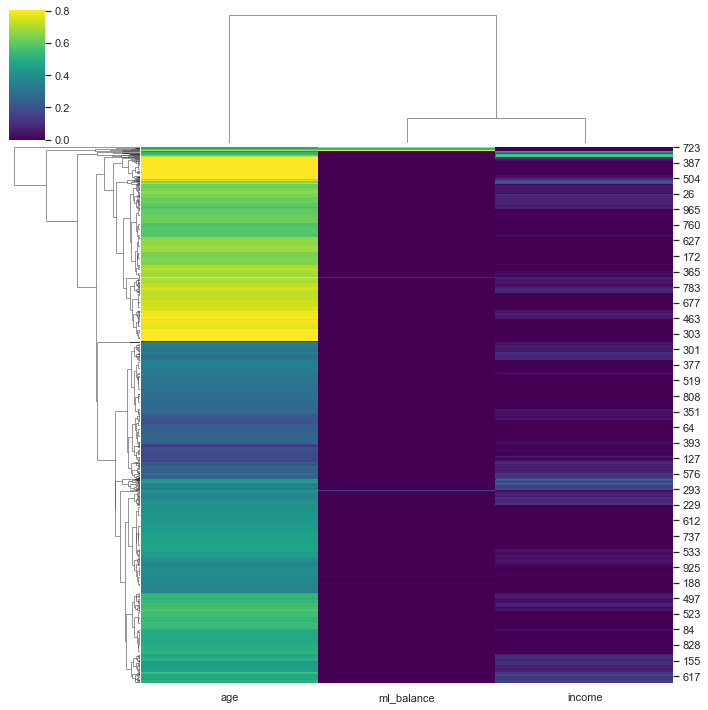

In [119]:
sns.clustermap(
    df.drop('city_type',axis=1)[['age', 'ml_balance', 'income']].iloc[:1000],
    standard_scale=1,
    robust=True,
    # row_colors=row_colors,
    cmap='viridis')